In [1]:
%pip install numpy matplotlib scikit-learn torch


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim


In [118]:
# Generate synthetic regression dataset
np.random.seed(42)

size_sample = 25
X = np.random.uniform(-3, 3, size=(size_sample, 1))

Let's take a look at ojur data

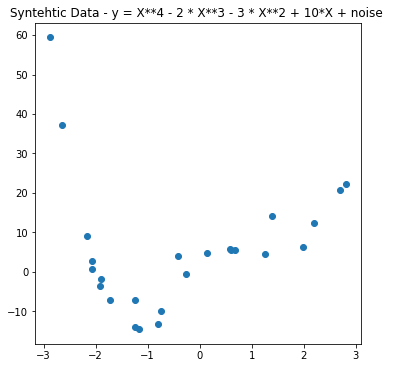

In [139]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.set_title("Syntehtic Data - y = X**4 - 2 * X**3 - 3 * X**2 + 10*X + noise ")
ax.scatter(X,y)

In [121]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [134]:
# Define a function to create a neural network
def create_model(num_hidden):
    return nn.Sequential(
        nn.Linear(1, num_hidden),
        nn.ReLU(),
        nn.Linear(num_hidden, 1)
    )


# Training and evaluation function
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=500):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.09)

    # Training loop with gradient clipping to prevent NaN losses
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)

        if torch.isnan(loss):
            print(f"NaN loss encountered at epoch {epoch}. Stopping training.")
            break

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test)
        test_loss = criterion(test_predictions, y_test).item()

    return test_loss

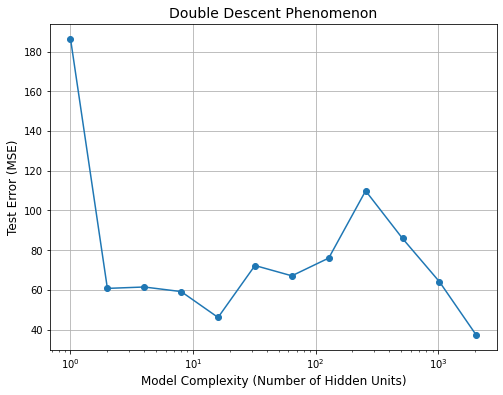

In [137]:

# Test models with varying number of hidden units
hidden_units = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
test_errors = []

for num_hidden in hidden_units:
    model = create_model(num_hidden)
    test_loss = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    test_errors.append(test_loss)

# Plot the test error curve
plt.figure(figsize=(8, 6))
plt.plot(hidden_units, test_errors, marker='o')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Hidden Units)', fontsize=12)
plt.ylabel('Test Error (MSE)', fontsize=12)
plt.title('Double Descent Phenomenon', fontsize=14)
plt.grid(True)
plt.show()
